# <span style="color:royalblue"><center> Ejercicios de tipo Bernoulli, Binomimales y Random Binomial </center></span>

Hay dos tipos de escuelas: $Bayesiana vs Frecuentista$. Los generadores aleatorios tienen que ver con el hecho de que sean una simulación de experimentos aleatorios como si fueran la vida real con algoritmos determinísticos. 

In [1]:
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt

## Secuencias de eventos tipo Bernoulli

$ P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}$

In [2]:
# definición de la distribución binomial 
def my_binomial(k, n, p):
      return factorial(n)/(factorial(k)*(factorial(n-k)))*pow(p,k)*pow(1-p, n-k)

In [5]:
print('my binomial: {}'.format(my_binomial(2, 3, 0.5)))
"""
Se define primero una función Binomial en la cual hay los parámetros
Con 3 eventos, cuya probabilidad es de 0.5 de probabilidad y a la cual
Se le aplica la clase probability mass function .pmf a 2 caras
"""
dist = binom(3, 0.5) 
dist.pmf(2)

my binomial: 0.375


0.3750000000000001

In [7]:
dist = binom(5, 0.5) 
dist.pmf(3)

0.31249999999999983

## Validación del ejercicio hecho a mano

$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$


In [6]:
"""
Acá se va a utilizar la clase para la cummulative density function,
Bajo la clase .cdf. Es decir, calcule la densidad acumulada de que tenga 2 o menos
Caras.
"""
print(7/8.0)
dist.cdf(2)

0.875


0.875

## Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [18]:
# simulación con 100 lanzamientos de moneda equilibrada
# (ejecuta esta celda varias veces para observar la variación en los resultados)
p=0.5
n=3
binomial(n, p)

1

In [19]:
# Vamos a hacer un experimento generando una muestra de conjuntos de 
#lanzamientos de a 3 monedas
arr = []
for _ in range(100):
    arr.append(binomial(n, p))

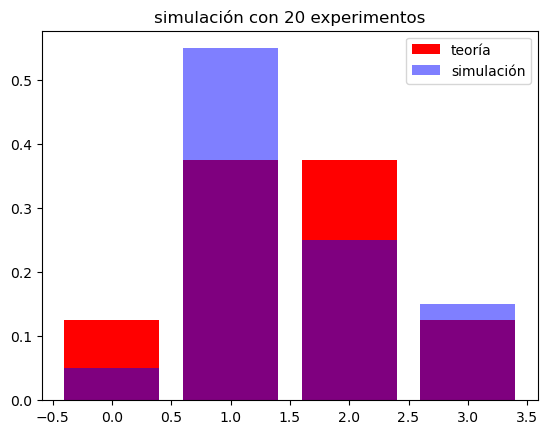

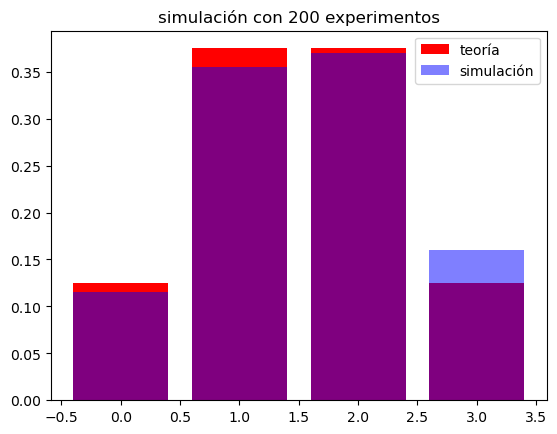

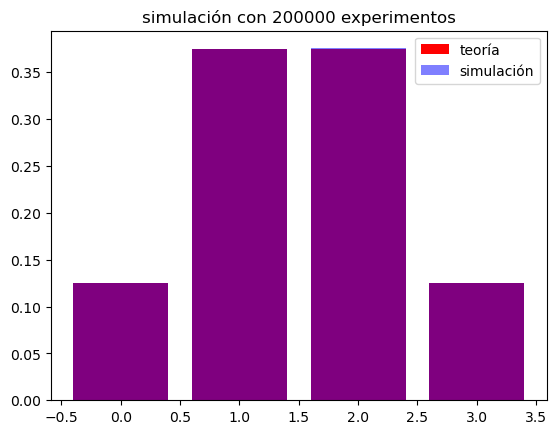

In [23]:
def plot_hist(num_trials):  
    values = [0,1,2,3]
    arr = []
    for _ in range(num_trials):
        arr.append(binomial(3, 0.5))
        #Cuántas veces aparece el único valor en un array de Python
    distribucion_simulada = np.unique(arr, return_counts=True)[1]/len(arr)
    #¿Qué es la distribución Teórica?
    #Coger la binomial, con 3 lanzamientos bajo 0.5, coja la .pmf para k éxitos en 
    #Todos los posibles values (0,1,2,3 caras)
    distribucion_teorica = [binom(3, 0.5).pmf(k) for k in values]
    plt.bar(values, distribucion_teorica, label = 'teoría', color = 'red')
    plt.bar(values, distribucion_simulada, label = 'simulación', alpha = 0.5, color = 'blue')
    plt.title('simulación con {} experimentos'.format(num_trials))
    plt.legend()
    plt.show()

plot_hist(20)
plot_hist(200)
plot_hist(200000)

Frecuentistamente, se cumple que cuando el número de experimentos tiende a infinito, se va acercando a la teoría.